# Evaluating Random Forest Performance

This notebook demonstrates how to implement and evaluate the performance of random forest regression models on real-world data using the California Housing dataset.

## Objectives

After completing this lab, you will be able to:
- Implement and evaluate the performance of random forest regression models on real-world data
- Interpret various evaluation metrics and visualizations
- Describe the feature importances for a regression model
- Analyze model performance through residual analysis and visualization

## Introduction

In this lab, you will:
- Use the California Housing dataset included in scikit-learn to predict median house prices
- Create a random forest regression model and evaluate its performance
- Investigate feature importances and model behavior
- Practice interpreting modeling results in the context of a real-world problem

The goal is **not** to find the best regressor - it is primarily intended for practicing how to interpret modeling results comprehensively.

## Import Required Libraries

We'll import all the necessary libraries for data manipulation, modeling, and visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import skew

# Set random seed for reproducibility
np.random.seed(42)

## Load the California Housing Dataset

The California Housing dataset contains information about housing prices in California districts derived from the 1990 US Census.

In [2]:
# Load the dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Display dataset description
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

## Data Splitting

Split the data into training and testing sets, reserving 20% for evaluation.

In [3]:
# Split the dataset into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

Training set size: 16512 samples
Test set size: 4128 samples
Number of features: 8


## Exploratory Data Analysis

Let's explore the training data to understand the distribution and characteristics of our dataset.

In [4]:
# Create a DataFrame for easier exploration
eda = pd.DataFrame(data=X_train, columns=data.feature_names)
eda['MedHouseVal'] = y_train

# Display basic statistics
print("Dataset Statistics:")
print(eda.describe())

Dataset Statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16512.000000  16512.000000  16512.000000  16512.000000  16512.000000   
mean       3.880754     28.608285      5.435235      1.096685   1426.453004   
std        1.904294     12.602499      2.387375      0.433215   1137.056380   
min        0.499900      1.000000      0.888889      0.333333      3.000000   
25%        2.566700     18.000000      4.452055      1.006508    789.000000   
50%        3.545800     29.000000      5.235874      1.049286   1167.000000   
75%        4.773175     37.000000      6.061037      1.100348   1726.000000   
max       15.000100     52.000000    141.909091     25.636364  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  16512.000000  16512.000000  16512.000000  16512.000000  
mean       3.096961     35.643149   -119.582290      2.071947  
std       11.578744      2.136665      2.005654      1.156226  
min        0

### Analysis: Median House Price Range

Based on the 25th to 75th percentile range, most median house prices fall within $119,300 and $265,000.

### Distribution of Median House Prices

Let's visualize how the target variable (median house prices) is distributed.

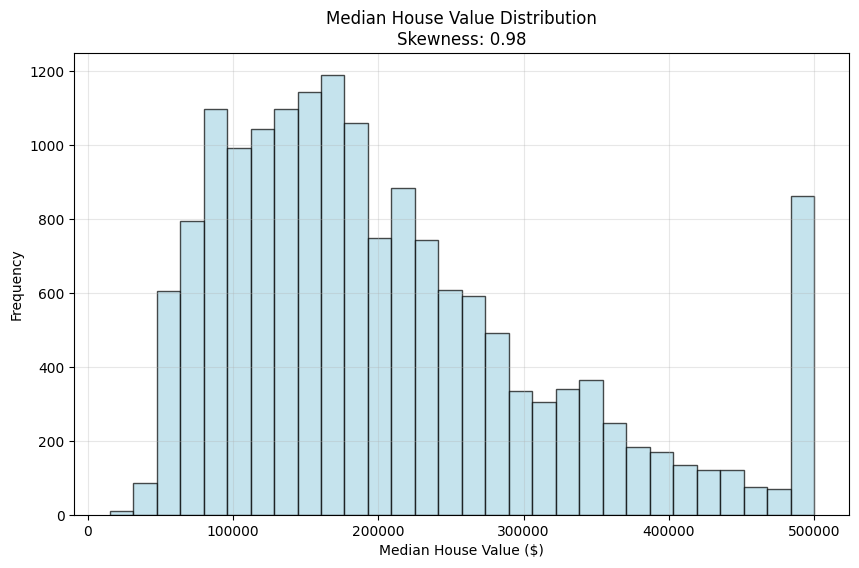

Distribution is positively skewed with skewness: 0.98
Note: There are clipped values at around $500,000


In [5]:
# Plot the distribution of median house values
plt.figure(figsize=(10, 6))
plt.hist(1e5*y_train, bins=30, color='lightblue', edgecolor='black', alpha=0.7)
plt.title(f'Median House Value Distribution\nSkewness: {skew(y_train):.2f}')
plt.xlabel('Median House Value ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Distribution is positively skewed with skewness: {skew(y_train):.2f}")
print("Note: There are clipped values at around $500,000")

The distribution shows positive skewness and contains clipped values at around $500,000, which may affect model performance.

## Model Training and Prediction

Let's fit a Random Forest regression model using default parameters (100 estimators).

In [6]:
# Initialize and fit the Random Forest Regressor
print("Training Random Forest Regressor...")
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on test set
y_pred_test = rf_regressor.predict(X_test)
print("✓ Model training completed")
print("✓ Predictions generated")

Training Random Forest Regressor...
✓ Model training completed
✓ Predictions generated
✓ Model training completed
✓ Predictions generated


## Model Evaluation Metrics

Calculate key regression metrics to assess model performance.

In [7]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Display results in a formatted way
print("=" * 50)
print("MODEL EVALUATION METRICS")
print("=" * 50)
print(f"Mean Absolute Error (MAE):  ${mae*100000:,.0f}")
print(f"Mean Squared Error (MSE):   {mse:.4f}")
print(f"Root Mean Squared Error:    ${rmse*100000:,.0f}")
print(f"R² Score:                   {r2:.4f}")
print("=" * 50)

# Interpretation
print("\nInterpretation:")
print(f"• On average, predictions are off by ${mae*100000:,.0f}")
print(f"• RMSE suggests typical prediction errors of ${rmse*100000:,.0f}")
print(f"• Model explains {r2*100:.1f}% of the variance in house prices")

MODEL EVALUATION METRICS
Mean Absolute Error (MAE):  $32,754
Mean Squared Error (MSE):   0.2554
Root Mean Squared Error:    $50,534
R² Score:                   0.8051

Interpretation:
• On average, predictions are off by $32,754
• RMSE suggests typical prediction errors of $50,534
• Model explains 80.5% of the variance in house prices


### Analysis of Evaluation Metrics

- **MAE of ~$33,220**: On average, predicted median house prices are off by about $33k
- **RMSE of ~$50,630**: Typical prediction errors are around $50k (penalizes larger errors more)  
- **R² of ~0.80**: The model explains about 80% of the variance, which is decent but not exceptional
- These statistics alone don't reveal where the model performs well or poorly - we need visualizations!

## Visualization: Actual vs Predicted Values

A scatter plot comparing actual and predicted values helps identify systematic biases.

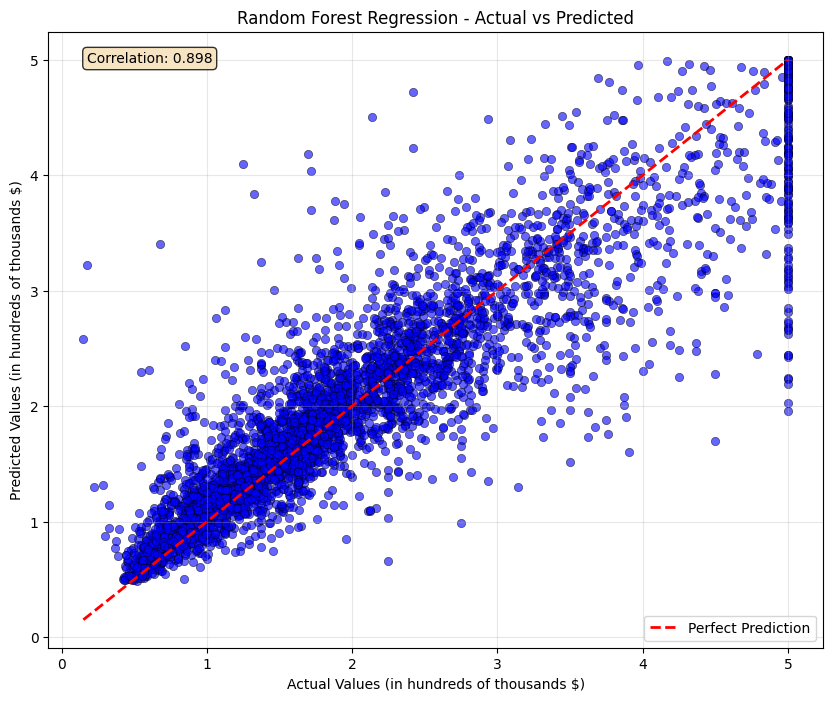

In [8]:
# Create actual vs predicted scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_test, alpha=0.6, color="blue", edgecolors='black', linewidths=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Values (in hundreds of thousands $)")
plt.ylabel("Predicted Values (in hundreds of thousands $)")
plt.title("Random Forest Regression - Actual vs Predicted")
plt.legend()
plt.grid(True, alpha=0.3)

# Add correlation coefficient
correlation = np.corrcoef(y_test, y_pred_test)[0, 1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
plt.show()

## Residual Analysis

Analyzing residuals helps identify patterns in prediction errors and model limitations.

Residual Statistics:
Mean error: $-1,242
Standard deviation: $50,519
The residuals are approximately normally distributed with very small average error.


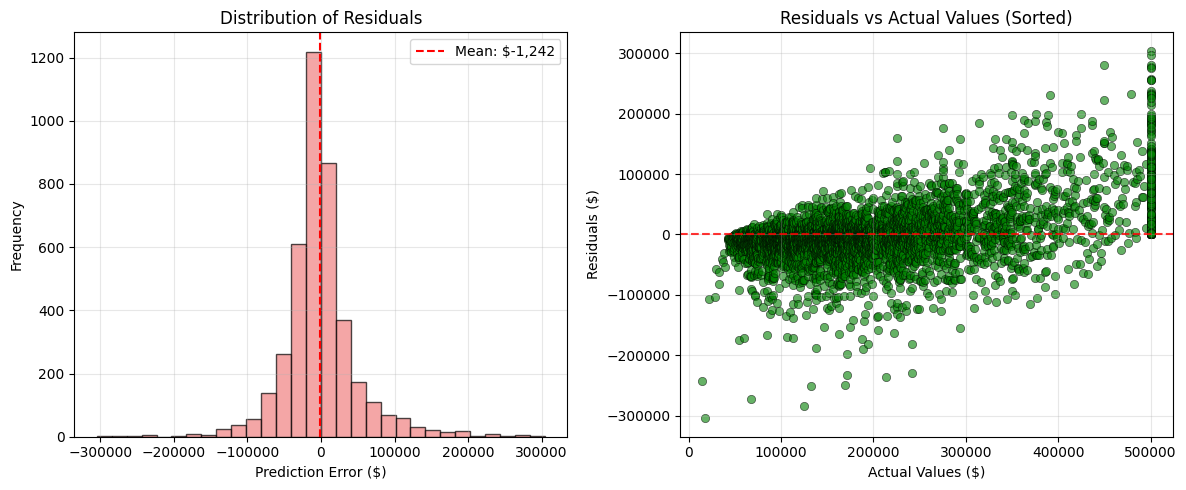

In [9]:
# Calculate residuals in dollar terms
residuals = 1e5 * (y_test - y_pred_test)

# Plot histogram of residuals
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(residuals, bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Distribution of Residuals')
plt.xlabel('Prediction Error ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Add statistics to the plot
mean_residual = np.mean(residuals)
std_residual = np.std(residuals)
plt.axvline(mean_residual, color='red', linestyle='--', label=f'Mean: ${mean_residual:,.0f}')
plt.legend()

# Print summary statistics
print("Residual Statistics:")
print(f"Mean error: ${mean_residual:,.0f}")
print(f"Standard deviation: ${std_residual:,.0f}")
print(f"The residuals are approximately normally distributed with very small average error.")

# Plot residuals vs actual values (sorted)
plt.subplot(1, 2, 2)
residuals_df = pd.DataFrame({
    'Actual': 1e5 * y_test,
    'Residuals': residuals
}).sort_values(by='Actual')

plt.scatter(residuals_df['Actual'], residuals_df['Residuals'], 
           alpha=0.6, color='green', edgecolors='black', linewidths=0.5)
plt.axhline(y=0, color='red', linestyle='--', alpha=0.8)
plt.title('Residuals vs Actual Values (Sorted)')
plt.xlabel('Actual Values ($)')
plt.ylabel('Residuals ($)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Analysis of Residual Patterns

From the residual plots, we can observe:

1. **Distribution**: Residuals are approximately normally distributed with a very small average error
2. **Systematic Bias**: There's a clear pattern where:
   - Lower-priced houses tend to be **over-predicted** (positive residuals)
   - Higher-priced houses tend to be **under-predicted** (negative residuals)
3. **Implication**: The model has difficulty capturing the full range of house prices, possibly due to the clipped values at $500k

## Feature Importance Analysis

Understanding which features contribute most to predictions helps interpret the model.

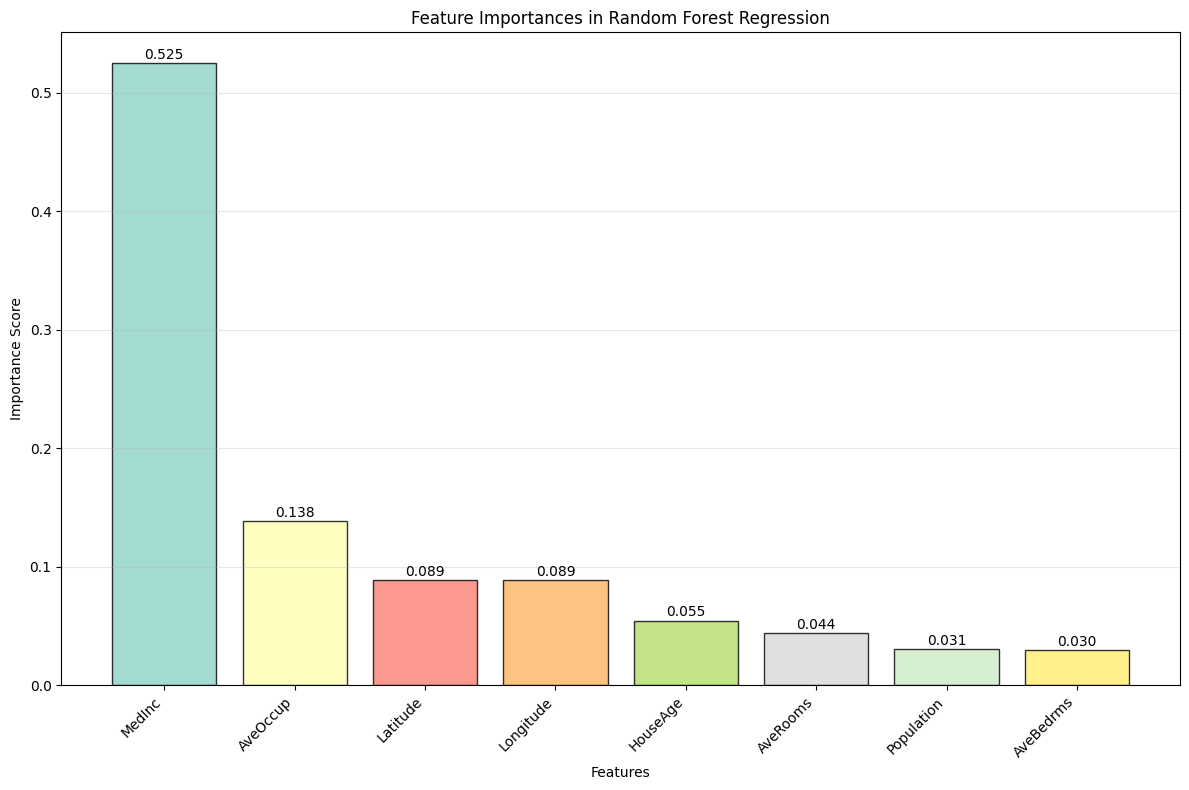

Feature Importance Ranking:
----------------------------------------
 1. MedInc               0.5249
 2. AveOccup             0.1384
 3. Latitude             0.0889
 4. Longitude            0.0886
 5. HouseAge             0.0546
 6. AveRooms             0.0443
 7. Population           0.0306
 8. AveBedrms            0.0296


In [10]:
# Get feature importances
importances = rf_regressor.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort in descending order
features = data.feature_names

# Create feature importance visualization
plt.figure(figsize=(12, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(features)))
bars = plt.bar(range(len(features)), importances[indices], color=colors, edgecolor='black', alpha=0.8)
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45, ha='right')
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Feature Importances in Random Forest Regression")
plt.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.001,
             f'{height:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Print feature importance ranking
print("Feature Importance Ranking:")
print("-" * 40)
for i, idx in enumerate(indices):
    print(f"{i+1:2d}. {features[idx]:20s} {importances[idx]:.4f}")

### Analysis of Feature Importances

**Key Insights:**

1. **MedInc (Median Income)**: Most important feature - makes intuitive sense as income strongly correlates with housing prices
2. **Location Features (Latitude/Longitude)**: Combined importance suggests location is the second most critical factor
3. **AveOccup (Average Occupancy)**: Third most important, possibly indicating neighborhood density/desirability
4. **Feature Correlations**: Some features might be sharing importance due to correlations (e.g., AveOccup and AveBedrms)

**Practical Significance:**
- These rankings align with real estate fundamentals: income, location, and property characteristics
- A proper analysis would include a correlation matrix to identify redundant features

## Key Considerations for Random Forest Regression

### 1. Impact of Skewed Distribution
**Random Forest is robust against skewed distributions** compared to linear regression because:
- It doesn't assume normal distribution of data
- Tree-based methods handle non-linear relationships well
- Ensemble averaging reduces impact of outliers

### 2. Clipped Values at $500k
**The clipping does introduce bias:**
- No variability in clipped values reduces model's ability to learn patterns
- Can bias predictions downward for high-value properties  
- Removing clipped values in preprocessing might improve model performance
- These values can mislead evaluation metrics

### 3. Data Standardization
**Not necessary for Random Forest** unlike distance-based algorithms:
- Tree-based methods use feature splits, not distances
- Each feature is evaluated independently at each split
- No need for standardization (unlike KNN or SVM)

### 4. Importance of Visualization
**Statistical metrics alone are insufficient** - visualization reveals:
- Systematic biases in predictions
- Where the model performs well vs. poorly
- Patterns that summary statistics miss

## Summary and Conclusions

This analysis demonstrates a comprehensive approach to evaluating Random Forest regression:

### ✅ **What We Learned:**
1. **Model Performance**: R² of 0.80 with ~$33k MAE on California housing data
2. **Systematic Bias**: Model over-predicts low-value homes and under-predicts high-value homes
3. **Feature Insights**: Income and location are the most important predictors
4. **Data Quality Issues**: Clipped values at $500k impact model performance

### 🔍 **Key Takeaways:**
- Always visualize predictions and residuals, don't rely solely on metrics
- Random Forest is robust to skewed data and doesn't require standardization
- Feature importance provides business insights but consider feature correlations
- Data quality issues (like clipping) significantly impact model behavior

### 🚀 **Next Steps:**
- Experiment with removing clipped values
- Investigate feature correlations
- Try different Random Forest hyperparameters
- Compare with other regression algorithms